# Exercise 1

$\textbf{Compute the velocity and acceleration by differentiating the signal.}$ <br>
For the differentiation, pick any finite difference formulation you consider appropriate. <br>
Then, study the frequency content of the three signals (displacement, velocity and acceleration). <br>
What do you see and why?

In [1]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, get_window, firwin, freqz
from scipy.signal.windows import general_hamming
%matplotlib inline

# Finite difference differentiation

## Functions

* $\textbf{Diff_1st_order}$ <br>
Compute derivatives with first order backward difference approximation: <br>
$ y'(x_i) = \frac{y(x_i)−y(x_{i−1})}{\Delta x} $ <br>
$ y''(x_i) = \frac{y(x_i)−2y(x_{i−1})+y(x_{i-2})}{\Delta x^2} $ <br>
For the first point (firsts 2 for the 2nd order derivative), the forward difference approximation, that mirrors the expression above, is considered. <br>

```{note}
In this way the first two elements will be just the opposite of each other.
This problem could be addressed in different ways.
Some of them:
1) Neglect the first derivative term. Since the firsts elements of the series don't measure important values.
2) Since, in fact, we have the datas for t<5s we could consider them to compute the backward derivative also at x=t=5s. 
```

```{admonition} Note2
:class: dropdown
I could use simply: dy[0:-1] = np.diff(y)/np.diff(x)
                    dy[-1] = (y[-1] - y[-2])/delta_x[-1]
That would be equal to a forward first order diff approx, except at the last point where a backward approach is used.
```

* $\textbf{Diff_2nd_order}$ <br>
Compute derivatives with second order central difference approximation: <br>
$ y'(x_i) = \frac{y(x_{i+1})−y(x_{i−1})}{2 \Delta x} $ <br>
$ y''(x_i) = \frac{y(x_{i+1})−2y(x_i)+y(x_{i-1})}{\Delta x^2} $ <br> 
The derivatives for the 2 points at the edge, is computed with the forward differencing at the left and the backwards one on the right. <br>
Forward: <br>
$ y'(x_i) = \frac{-y(x_{i+2})+4y(x_{i+1})-3y(x_i)}{2 \Delta x} $ <br>
$ y''(x_i) = \frac{-y(x_{i+3})+4y(x_{i+2})-5y(x_{i+1})+2y(x_i)}{\Delta x^2} $ <br>
Backward: <br>
$ y'(x_i) = \frac{y(x_{i-2})-4y(x_{i-1})+3y(x_i)}{2 \Delta x} $ <br>
$ y''(x_i) = \frac{-y(x_{i-3})+4y(x_{i-2})-5y(x_{i-1})+2y(x_i)}{\Delta x^2} $ <br>

```{note}
:class: dropdown
To notice:
To compute the 2nd order difference schemes the pre-implemented python function $ \textbf{gradient}$ could be considered:  <br>
It uses second order accurate central differences in the interior points and second order accurate one-sides (forward or backwards) differences at the boundaries:  <br>
y_prime_2nd = np.gradient(y, x, edge_order=2)  <br>
<br>
My function and the gradient function were tested and compared leading to negligible differences regarding the first order derivative:  <br>max(abs(error)) = 1.6122214674396673e-11  <br>

error = abs(y_prime_2nd - np.gradient(y, x, edge_order=2))
plt.plot(error)
print(max(error))
```

In [2]:
def Diff_1st_order(x,y):
    """ 
    Compute derivatives with first order backward difference approximation:
    y'(xi) = (y(xi)−y(xi−1)) / Δx 
    y''(xi) = (y(xi)−2y(xi−1)+y(xi-2) / Δx^2 
    For the first point (firsts 2 for the 2nd order derivative), 
    The forward difference approximation, that mirrors the expression above, 
    is considered 
    """
    
    N = x.shape[0]
    
    delta_x = np.empty(N)
    y_prime = np.empty(N) # 1st order derivative
    y_prime2 = np.empty(N) # 2nd order derivative
    # Forward first order differencing approx 
    delta_x[0] = x[1] - x[0]
    y_prime[0] = (y[1] - y[0]) / delta_x[0]
    y_prime2[0] = (y[2] - 2*y[1] + y[0]) / delta_x[0]**2
    # Backward first order differencing approx 
    for i in range(1, N):
        delta_x[i] = x[i] - x[i-1]
        y_prime[i] = (y[i] - y[i-1]) / delta_x[i]
        if i == 1:
            y_prime2[i] = (y[i+2] - 2*y[i+1] + y[i]) / delta_x[i]**2
        else:
            y_prime2[i] = (y[i] - 2*y[i-1] + y[i-2]) / delta_x[i]**2
            
    return y_prime, y_prime2

def Diff_2nd_order(x,y):
    """ 
    Compute derivatives with second order central difference approximation:
    y'(xi) = (y(xi+1)−y(xi−1)) / 2Δx 
    y''(xi) = (y(xi+1)−2y(xi)+y(xi-1) / Δx^2 
    The derivatives for the 2 points at the edge, is computed with the forward
    differencing at the left and the backwards one on the right.
    Forward:
    y'(xi) = (-y(xi+2)+4y(xi+1)-3y(xi)) / 2Δx 
    y''(xi) = (-y(xi+3)+4y(xi+2)-5y(xi+1)+2y(xi)) / Δx^2
    Backward:
    y'(xi) = (y(xi-2)-4y(xi-1)+3y(xi)) / 2Δx 
    y''(xi) = (-y(xi-3)+4y(xi-2)-5y(xi-1)+2y(xi)) / Δx^2
    """
    
    N = x.shape[0]
    
    delta_x = np.empty(N)
    # y_prime = np.gradient(y, x, edge_order=2) # 1st order derivative
    y_prime = np.empty(N) # 1st order derivative
    y_prime2 = np.empty(N) # 2nd order derivative
    
    # Forward first order differencing approx 
    delta_x[0] = x[1] - x[0]
    y_prime[0] = (-y[2] + 4*y[1] - 3*y[0]) / (2*delta_x[0])
    y_prime2[0] = (-y[3] + 4*y[2] - 5*y[1] + 2*y[0]) / delta_x[0]**2
    # Central second order differencing approx 
    for i in range(1, N):
        delta_x[i] = x[i] - x[i-1]
        if i == N-1:
            y_prime[i] = (3*y[i] - 4*y[i-1] + y[i-2]) / (2*delta_x[i])
            y_prime2[i] = (-y[i-3] + 4*y[i-2] - 5*y[i-1] + 2*y[i]) / delta_x[i]**2
        else:
            y_prime[i] = (y[i+1] - y[i-1]) / (2*delta_x[i])
            y_prime2[i] = (y[i+1] - 2*y[i] + y[i-1]) / delta_x[i]**2
    
    return y_prime, y_prime2

In [3]:
# Import data from Excel file

# We consider datas only from t=5s onwards
# For this reason we discard the first 500 values
columns = ['Time','ODS_raw']
n = 500
data_raw = pd.read_excel('Signal_raw092.xlsx', 
                         header=None, skiprows=n+1, names=columns)
x, y = np.array(data_raw.Time), np.array(data_raw['ODS_raw'])

#print('Dataset starting from t=5s')
#print(data_raw)

# Finite difference differentiation

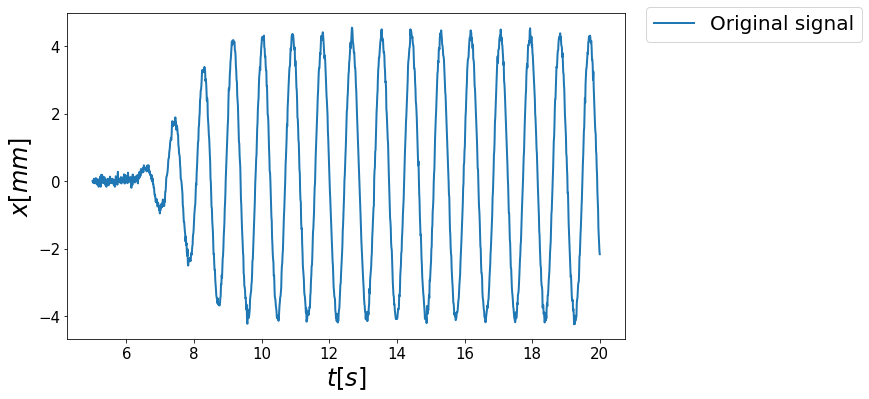

In [4]:
fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(x, y ,label='Original signal',linewidth=2.0)
plt.xlabel('$t [s]$',fontsize=24)
plt.ylabel('$x [mm]$',fontsize=24)
plt.legend(bbox_to_anchor=(1.02, 1.05), fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)     
plt.show()

## First and second order derivative (velocity and acceleration) with first and second order schemes

In [5]:
y_prime_1st, y_prime2_1st = Diff_1st_order(x,y) # 1st order schemes
y_prime_2nd, y_prime2_2nd = Diff_2nd_order(x,y) # 2nd order schemes

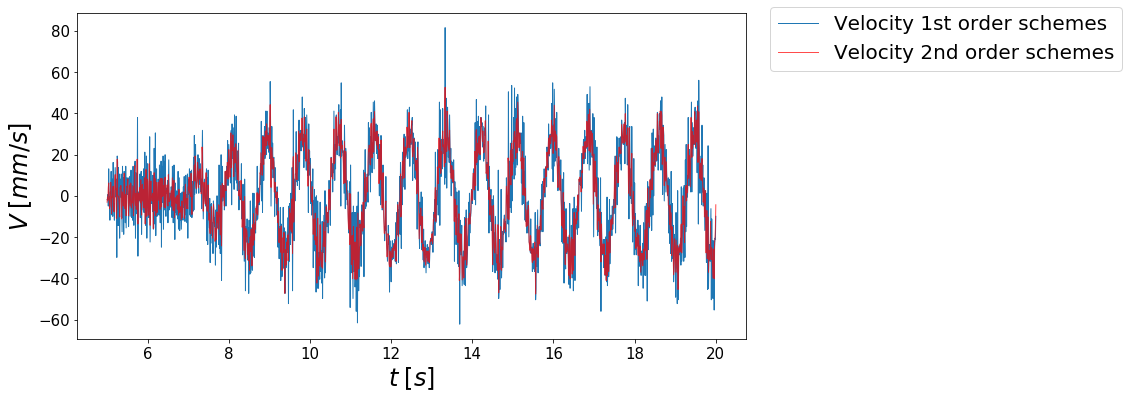

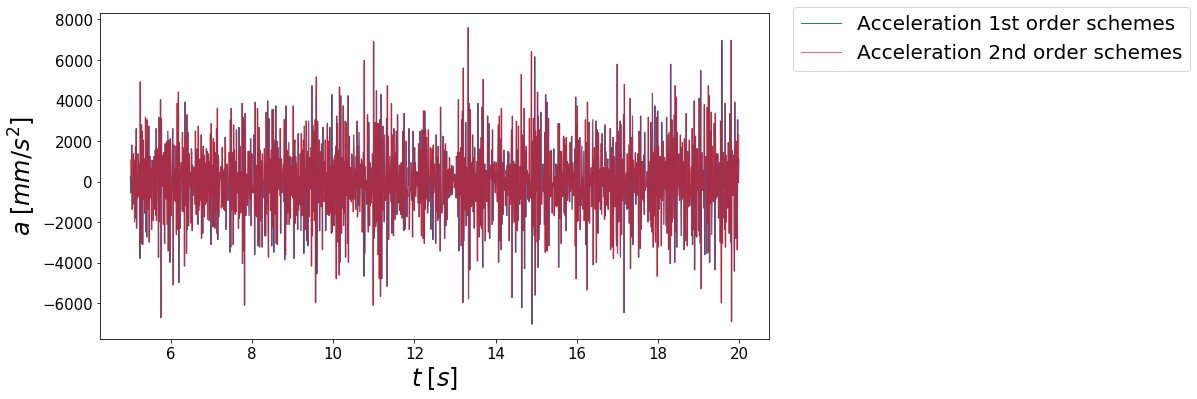

In [6]:
fig, ax = plt.subplots(figsize=(12,6)) 
plt.plot(x,y_prime_1st,label='Velocity 1st order schemes',linewidth=1.0)
plt.plot(x,y_prime_2nd,'r',label='Velocity 2nd order schemes',linewidth=1.0, alpha=0.7)
plt.xlabel('$t \; [s]$',fontsize=24)
plt.ylabel('$V \; [mm/s]$',fontsize=24)
plt.legend(bbox_to_anchor=(1.02, 1.05), fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)     
plt.show()

fig, ax = plt.subplots(figsize=(12,6)) 
plt.plot(x,y_prime2_1st,label='Acceleration 1st order schemes',linewidth=1.0)
plt.plot(x,y_prime2_2nd,'r',label='Acceleration 2nd order schemes',linewidth=1.0, alpha=0.6)
plt.xlabel('$t \; [s]$',fontsize=24)
plt.ylabel('$a \; [mm/s^2]$',fontsize=24)
plt.legend(bbox_to_anchor=(1.02, 1.05), fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)     
plt.show()

```{note}
It can already be observed that the derivative operation makes the signal noisier.
```

# Frequency analysis

## PSD & FFT Displacement

In this section, the frequency content of the signal is analysed by $\textbf{PSD}$ (using windowing) and $\textbf{FFT}$.

In [7]:
dt = 0.01 #s
fs = 1/dt # Hz

Nt = data_raw['Time'].shape[0]
Ntseg = Nt

window = 'hann'
Nwelch = Ntseg

f_welch_x, psd_x = signal.welch(y, fs, window, Nwelch, Nwelch/2, axis=0)
f_fft_x = np.arange(Nt//2+1)/Nt*fs
fft_x = np.fft.rfft(y*get_window(window, Nt))/np.sqrt(fs*(Nt//2+1))*np.sqrt(8./3.)

y_fft=(np.fft.fft(y))
freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

In [8]:
A = np.abs(y_fft[:len(y_fft)//2])/Nt
print("The signal has a maximum frequency content at: {} Hz".format(freqs_fft[np.argmax(A)]))

The signal has a maximum frequency content at: 1.1325782811459029 Hz


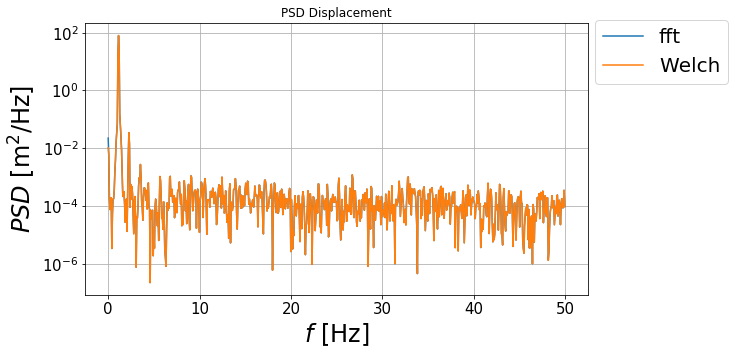

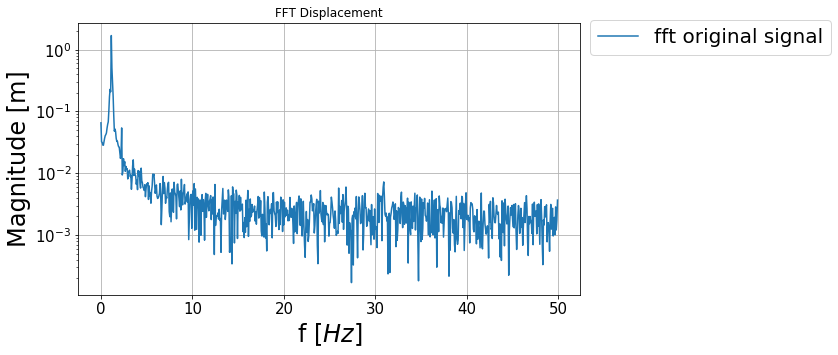

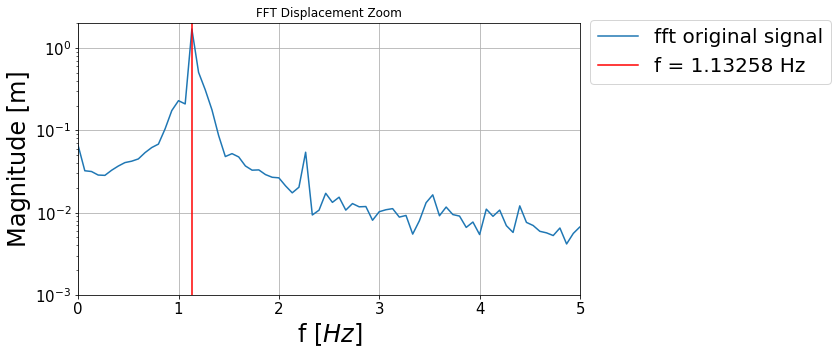

In [9]:
fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_fft_x, np.abs(fft_x)**2,label='fft')
plt.semilogy(f_welch_x, psd_x,label='Welch')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Displacement')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD$ [m$^2$/Hz]',fontsize=24)
plt.legend(bbox_to_anchor=(1.3, 1.05), fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(freqs_fft[:len(freqs_fft)//2],np.abs(y_fft[:len(y_fft)//2])/Nt,label='fft original signal')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [m]',fontsize=24)
#plt.xlim([0, 50])
plt.title('FFT Displacement')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor=(1.52, 1.05), fontsize=20)  
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(freqs_fft[:len(freqs_fft)//2],np.abs(y_fft[:len(y_fft)//2])/Nt,label='fft original signal')
plt.axvline(x=1.13258, color='red', label='f = 1.13258 Hz')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [m]',fontsize=24)
plt.xlim([0, 5])
plt.ylim([1e-3, 2])
plt.title('FFT Displacement Zoom')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor=(1.52, 1.05), fontsize=20)     
plt.show()

Frequency analysis of the displacement signal shows that the main frequency of motion is 1.13258 Hz. <br> 
The higher frequency signal components are mainly characterised by noise

## PSD & FFT Velocity

In [10]:
f_welch_V1, psd_V1 = signal.welch(y_prime_1st, fs, window, Nwelch, Nwelch/2, axis=0)
f_welch_V2, psd_V2 = signal.welch(y_prime_2nd, fs, window, Nwelch, Nwelch/2, axis=0)

V1_fft=(np.fft.fft(y_prime_1st))
V2_fft=(np.fft.fft(y_prime_2nd))
V_freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

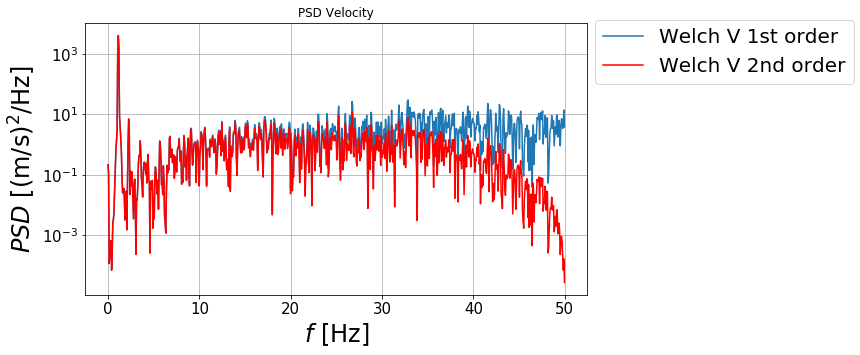

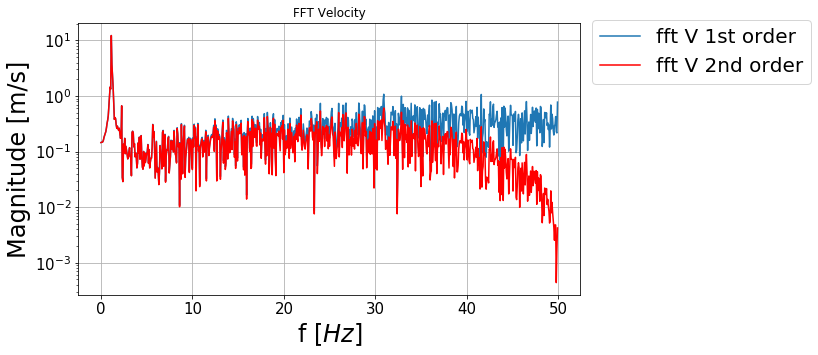

In [11]:
fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_welch_V1, psd_V1,label='Welch V 1st order')
plt.semilogy(f_welch_V2, psd_V2,'r',label='Welch V 2nd order')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Velocity')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD$ [(m/s)$^2$/Hz]',fontsize=24)
plt.legend(bbox_to_anchor=(1.55, 1.05), fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(V_freqs_fft[:len(V_freqs_fft)//2],np.abs(V1_fft[:len(V1_fft)//2])/Nt,label='fft V 1st order')
plt.semilogy(V_freqs_fft[:len(V_freqs_fft)//2],np.abs(V2_fft[:len(V2_fft)//2])/Nt,'r',label='fft V 2nd order')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [m/s]',fontsize=24)
plt.title('FFT Velocity')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor=(1.48, 1.05), fontsize=20)     
plt.show()

## PSD & FFT Acceleration

In [12]:
# PSD Acceleration
f_welch_acc1, psd_acc1 = signal.welch(y_prime2_1st, fs, window, Nwelch, Nwelch/2, axis=0)
f_welch_acc2, psd_acc2 = signal.welch(y_prime2_2nd, fs, window, Nwelch, Nwelch/2, axis=0)

acc1_fft=(np.fft.fft(y_prime2_1st))
acc2_fft=(np.fft.fft(y_prime2_2nd))
acc_freqs_fft=freq = np.fft.fftfreq(Nt, d=dt)

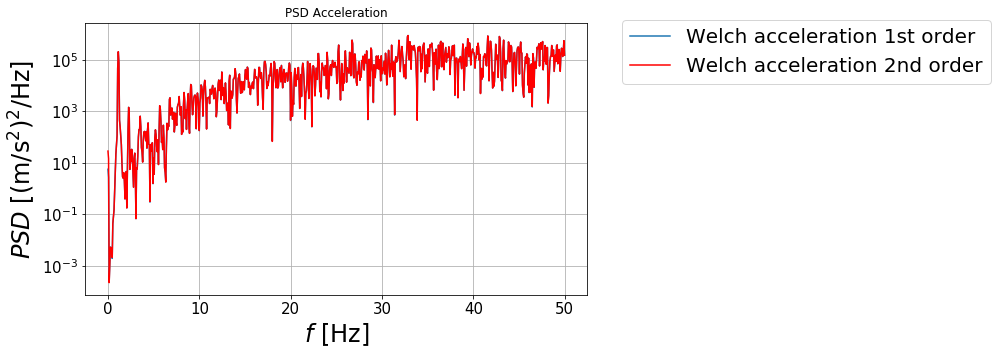

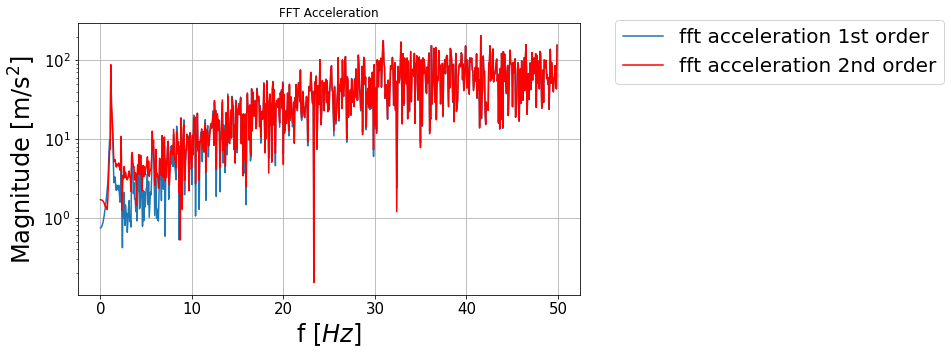

In [13]:
fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(f_welch_acc1, psd_acc1,label='Welch acceleration 1st order')
plt.semilogy(f_welch_acc2, psd_acc2,'r',label='Welch acceleration 2nd order')
plt.legend(fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('PSD Acceleration')
plt.xlabel(r'$f$ [Hz]',fontsize=24)
plt.ylabel(r'$PSD$ [(m/s$^2$)$^2$/Hz]',fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1.05), fontsize=20)
plt.show()

fig, ax = plt.subplots(figsize=(9,5))
plt.semilogy(acc_freqs_fft[:len(acc_freqs_fft)//2],np.abs(acc1_fft[:len(acc1_fft)//2])/Nt,label='fft acceleration 1st order')
plt.semilogy(acc_freqs_fft[:len(acc_freqs_fft)//2],np.abs(acc2_fft[:len(acc2_fft)//2])/Nt,'r',label='fft acceleration 2nd order')
plt.legend(fontsize=20)
plt.xlabel('f $[Hz]$',fontsize=24)
plt.ylabel('Magnitude [m/s$^2$]',fontsize=24)
#plt.xlim([0, 50])
plt.title('FFT Acceleration')
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1.05), fontsize=20)    
plt.show()

As noted above, the derivative operation increases the signal noise. <br>
In the case of velocity, the derivative obtained with second-order finite differences has lower frequency content at high frequencies. <br>
The phenomenon of increased signal noise due to the derivative is even more visible in the case of acceleration, where the PSD highlights how the higher frequency has now approximately tha same intensity as the signal containing ones.